In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)

In [5]:
df_final = pd.read_csv("df_drivers.csv")

df_final.head()

,facility_id,facility_name,county,hospital_type,teaching_rural,bed_size_category,licensed_beds,staffed_beds,occupied_beds,patient_days,discharges,operating_expense,net_patient_revenue,net_income,flag_zero_patient_days,flag_zero_beds,flag_negative_income,utilization_rate,cost_per_patient_day,revenue_per_patient_day,margin_per_patient_day,operating_margin,loss_driver
0,106580996,ADVENTIST HEALTH AND RIDEOUT,Yuba,Comparable,Non-Teaching,200 - 299,221,151,147.885246,54126,11372,525727747,482851282,-48743941,False,False,True,0.979372,9713.035270,8920.875032,-900.564257,-0.100950,High cost structure
1,106150788,ADVENTIST HEALTH BAKERSFIELD,Kern,Comparable,Non-Teaching,300 - 499,301,198,198.631148,72699,17945,704834525,698464738,-5197092,False,False,True,1.003188,9695.243745,9607.625112,-71.487806,-0.007441,High cost structure
2,106171049,ADVENTIST HEALTH CLEARLAKE,Lake,Comparable,Rural,1 - 49,25,18,15.658470,5731,1497,209729803,183332113,-17011138,False,False,True,0.869915,36595.673181,31989.550340,-2968.266969,-0.092789,High cost structure
3,106150706,ADVENTIST HEALTH DELANO,Kern,Comparable,Non-Teaching,150 - 199,156,69,64.196721,23496,2614,111157919,100703448,220351,False,False,False,0.930387,4730.929477,4285.982635,9.378235,0.002188,Profitable
4,106190323,ADVENTIST HEALTH GLENDALE,Los Angeles,Comparable,Non-Teaching,500 +,515,313,310.866120,113777,19036,615072638,563092249,-44826471,False,False,True,0.993182,5405.948812,4949.086801,-393.985349,-0.079608,Profitable


### Purpose

Identify hospitals that currently require leadership attention.
This table prioritizes facilities by financial risk and explains why each hospital is flagged.

In [7]:
# Create hospital risk list
hospital_risk_list = (
    df_final[
        df_final["flag_negative_income"] == True
    ][
        [
            "facility_id",
            "facility_name",
            "county",
            "bed_size_category",
            "teaching_rural",
            "loss_driver",
            "net_income",
            "cost_per_patient_day",
            "revenue_per_patient_day",
            "operating_margin",
            "utilization_rate",
        ]
    ]
    .sort_values("net_income")
)

hospital_risk_list.head(10)


,facility_id,facility_name,county,bed_size_category,teaching_rural,loss_driver,net_income,cost_per_patient_day,revenue_per_patient_day,operating_margin,utilization_rate
304,106430705,REGIONAL MEDICAL CENTER OF SAN JOSE,Santa Clara,200 - 299,Non-Teaching,High cost structure,-309897047,12605.766781,9041.472425,-0.848036,0.994856
371,106380965,ST. MARY'S MEDICAL CENTER - SAN FRANCISCO,San Francisco,200 - 299,Teaching,High cost structure,-301569902,11777.301764,7656.738166,-1.409217,0.914292
434,106380939,ZUCKERBERG SAN FRANCISCO GENERAL HOSPITAL & TR...,San Francisco,300 - 499,Teaching,High cost structure,-154391311,12770.750014,8696.918912,-0.160160,0.992941
212,106380865,LAGUNA HONDA HOSPITAL AND REHABILITATION CENTER,San Francisco,500 +,Non-Teaching,Profitable,-128527481,1937.302762,811.374844,-0.948136,0.994512
50,106384202,CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...,San Francisco,100 - 149,Non-Teaching,High cost structure,-108338890,13244.920440,8160.377774,-0.563339,0.906911
301,106190517,PROVIDENCE TARZANA MEDICAL CENTER,Los Angeles,200 - 299,Non-Teaching,High cost structure,-106435817,9023.966986,6621.217758,-0.308546,0.912481
175,106370028,KAISER FOUNDATION HOSPITAL - SAN MARCOS,San Diego,150 - 199,Non-Teaching,High cost structure,-89651247,16848.780108,13085.213392,-0.280081,0.968639
362,106100899,ST. AGNES MEDICAL CENTER,Fresno,300 - 499,Teaching,Profitable,-75819803,6026.528064,5251.850951,-0.125301,0.999367
422,106190818,USC VERDUGO HILLS HOSPITAL,Los Angeles,150 - 199,Non-Teaching,High cost structure,-68588008,7861.603621,5430.177707,-0.423429,0.947706
236,106196168,MEMORIALCARE MILLER CHILDREN'S & WOMEN'S HOSPI...,Los Angeles,300 - 499,Teaching,High cost structure,-66066825,9094.747614,7752.640178,-0.145511,0.909169


### Interpretation

This list highlights hospitals with the largest financial losses, prioritized by dollar impact.
Most high risk hospitals are flagged due to high cost structure rather than low utilization.
Utilization remains high across facilities, reinforcing that cost and revenue dynamics are the primary levers.

### Purpose

Provide leadership with a clear prioritization of loss drivers based on financial impact.
This table answers which problem should be addressed first at a system level.

In [8]:
# Loss driver summary for executives
loss_driver_summary = (
    df_final
    .groupby("loss_driver")["net_income"]
    .agg(
        hospital_count="count",
        total_net_income="sum",
        average_net_income="mean"
    )
    .sort_values("total_net_income")
)

loss_driver_summary


,hospital_count,total_net_income,average_net_income
loss_driver,,,
High cost structure,57,-2101586205,-3.686993e+07
Low utilization,37,-322212445,-8.708444e+06
Profitable,341,16373198301,4.801524e+07


### Interpretation
This list highlights hospitals with the largest financial losses, prioritized by dollar impact.
Most high risk hospitals are flagged due to high cost structure rather than low utilization.
Utilization remains high across facilities, reinforcing that cost and revenue dynamics are the primary levers.

### Purpose
Identify hospital size segments where losses and risk concentrate.
This supports targeted operational or policy interventions rather than blanket actions.

In [9]:
# Executive segment summary by bed size
bed_size_exec = (
    df_final
    .groupby("bed_size_category")["net_income"]
    .agg(
        hospital_count="count",
        loss_hospital_count=lambda x: (x < 0).sum(),
        total_net_income="sum",
        average_net_income="mean"
    )
    .sort_values("total_net_income")
)

bed_size_exec


,hospital_count,loss_hospital_count,total_net_income,average_net_income
bed_size_category,,,,
1 - 49,78,17,215297027,2.760218e+06
100 - 149,63,28,329363164,5.227987e+06
50 - 99,70,29,357979017,5.113986e+06
150 - 199,48,14,942361972,1.963254e+07
200 - 299,62,17,1024710929,1.652760e+07
300 - 499,77,26,4559920182,5.921974e+07
500 +,37,5,6519767360,1.762099e+08


### Interpretation
Smaller and mid sized hospitals show a higher frequency of losses, indicating elevated operational risk.
Large hospitals generate the majority of system profit, which masks risk in smaller facilities.
Targeted support for small and mid sized hospitals is likely to yield better system stability than uniform interventions.

### Purpose
Assess whether losses concentrate by teaching status or rural designation to inform structural or policy responses.

In [10]:
# Executive segment summary by teaching rural status
teaching_exec = (
    df_final
    .groupby("teaching_rural")["net_income"]
    .agg(
        hospital_count="count",
        loss_hospital_count=lambda x: (x < 0).sum(),
        total_net_income="sum",
        average_net_income="mean"
    )
    .sort_values("total_net_income")
)

teaching_exec


,hospital_count,loss_hospital_count,total_net_income,average_net_income
teaching_rural,,,,
Rural,59,13,429837928,7.285389e+06
Teaching,41,8,6505914760,1.586808e+08
Non-Teaching,335,115,7013646963,2.093626e+07


### Interpretation
Non Teaching hospitals account for the majority of losses due to volume and higher loss frequency.
Teaching hospitals are strongly profitable on average, indicating structural advantages in funding, case mix, or pricing.
Rural hospitals are modestly profitable overall but still contain a non trivial subset of loss makers requiring targeted support.

In [11]:
# Dataset 1: Hospital KPI level dataset for Tableau
hospital_kpi_table = df_final[
    [
        "facility_id",
        "facility_name",
        "county",
        "hospital_type",
        "teaching_rural",
        "bed_size_category",
        "loss_driver",
        "licensed_beds",
        "staffed_beds",
        "occupied_beds",
        "patient_days",
        "net_income",
        "utilization_rate",
        "cost_per_patient_day",
        "revenue_per_patient_day",
        "margin_per_patient_day",
        "operating_margin",
    ]
]

hospital_kpi_table.to_csv("tableau_hospital_kpis.csv", index=False)


# Dataset 2: Loss driver summary
loss_driver_summary.to_csv("tableau_loss_driver_summary.csv")


# Dataset 3: Bed size segment summary
bed_size_exec.to_csv("tableau_bed_size_summary.csv")


# Dataset 4: Teaching rural segment summary
teaching_exec.to_csv("tableau_teaching_rural_summary.csv")


print("Exports complete:")
print("tableau_hospital_kpis.csv")
print("tableau_loss_driver_summary.csv")
print("tableau_bed_size_summary.csv")
print("tableau_teaching_rural_summary.csv")


Exports complete:
tableau_hospital_kpis.csv
tableau_loss_driver_summary.csv
tableau_bed_size_summary.csv
tableau_teaching_rural_summary.csv


### Final notebook summary

This project analyzed hospital level financial and operational data to identify the primary drivers of system wide losses.
The analysis shows that losses are driven primarily by high cost structures rather than low utilization, with risk concentrated in small and mid sized non teaching hospitals.

Value delivered
Clear prioritization of loss drivers based on financial impact
A ranked hospital risk list to guide immediate leadership attention
Structural segment summaries to support targeted policy and operational decisions
Tableau ready datasets to enable ongoing monitoring without re analysis

Next steps
Translate findings into a short executive presentation focused on decisions and priorities
Deploy a single Tableau dashboard to monitor hospital risk, cost efficiency, and margins over time

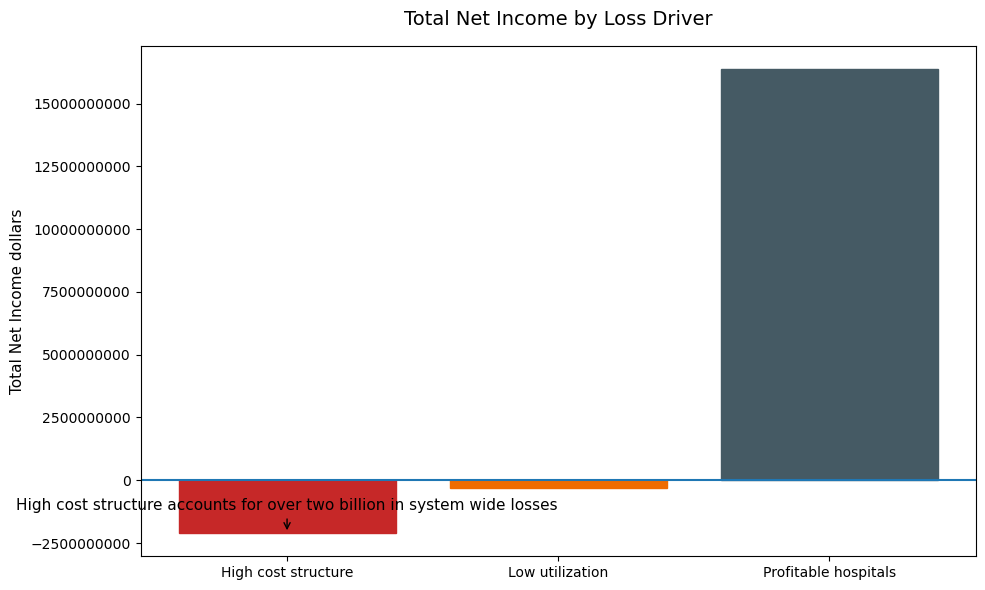

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from loss_driver_summary
data = {
    "Loss Driver": ["High cost structure", "Low utilization", "Profitable hospitals"],
    "Total Net Income": [-2101586205, -322212445, 16373198301]
}

df_plot = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_plot["Loss Driver"],
    df_plot["Total Net Income"]
)

# Color bars explicitly
bars[0].set_color("#C62828")   # red for high cost
bars[1].set_color("#EF6C00")   # muted orange
bars[2].set_color("#455A64")   # neutral dark gray

# Horizontal zero line
plt.axhline(0)

# Title
plt.title(
    "Total Net Income by Loss Driver",
    fontsize=14,
    pad=15
)

# Y axis formatting
plt.ylabel("Total Net Income dollars", fontsize=11)
plt.ticklabel_format(axis="y", style="plain")

# Annotation for key insight
plt.annotate(
    "High cost structure accounts for over two billion in system wide losses",
    xy=(0, -2101586205),
    xytext=(0, -1200000000),
    textcoords="data",
    arrowprops=dict(arrowstyle="->"),
    fontsize=11,
    ha="center"
)

# Clean look
plt.grid(False)
plt.tight_layout()

plt.show()
